## Import the libraries

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from IPython.display import SVG
from tensorflow.keras.utils import plot_model, model_to_dot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

## Read the Data

In [4]:
data = pd.read_csv('GOOGL.csv', date_parser = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [5]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600
...,...,...,...,...,...,...,...
3612,2018-12-24,984.320007,1012.119995,977.659973,984.669983,984.669983,1818000
3613,2018-12-26,997.989990,1048.449951,992.650024,1047.849976,1047.849976,2315900
3614,2018-12-27,1026.199951,1053.339966,1007.000000,1052.900024,1052.900024,2299800
3615,2018-12-28,1059.500000,1064.229980,1042.000000,1046.680054,1046.680054,1719900


In [6]:
data_testing = data[data['Date']>='2019-01-01'].copy()
data_testing

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1027.199951,1060.790039,1025.280029,1054.680054,1054.680054,1593400
3618,2019-01-03,1050.670044,1066.260010,1022.369995,1025.469971,1025.469971,2098000
3619,2019-01-04,1042.560059,1080.000000,1036.859985,1078.069946,1078.069946,2301100
3620,2019-01-07,1080.969971,1082.699951,1062.640015,1075.920044,1075.920044,2372300
3621,2019-01-08,1086.000000,1093.349976,1068.349976,1085.369995,1085.369995,1770700
...,...,...,...,...,...,...,...
4049,2020-09-18,1488.300049,1495.199951,1431.619995,1451.089966,1451.089966,3152800
4050,2020-09-21,1431.619995,1440.060059,1402.680054,1430.140015,1430.140015,2845400
4051,2020-09-22,1450.319946,1463.969971,1429.500000,1459.819946,1459.819946,1697500
4052,2020-09-23,1452.089966,1453.079956,1402.680054,1409.390015,1409.390015,1886300


In [7]:
training_data = data_training.drop(['Date','Adj Close'], axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,50.050049,52.082081,48.028027,50.220219,44659000
1,50.555557,54.594593,50.300301,54.209209,22834300
2,55.430431,56.796795,54.579578,54.754753,18256100
3,55.675674,55.855854,51.836838,52.487488,15247300
4,52.532532,54.054054,51.991993,53.053055,9188600


In [8]:
# Scale the values between 0 and 1
scaler = StandardScaler()
training_data = scaler.fit_transform(training_data)
scaler.scale_

array([2.98673445e+02, 3.01007983e+02, 2.96082784e+02, 2.98606917e+02,
       8.12933209e+06])

In [9]:
x_train = []
y_train = []

# Read the firts 30 days of the data

for i in range(30, training_data.shape[0]):
    x_train.append(training_data[i-30:i])
    y_train.append(training_data[i,0])

# Convert to an array
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Verify the shape of each array
x_train.shape, y_train.shape

((3587, 30, 5), (3587,))

## Build the LSTM - RNN

In [24]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 70, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 90, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(1))

In [25]:
# Print the structure of the Regressor
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 60)            15840     
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 60)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 70)            36680     
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 70)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 30, 90)            57960     
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 90)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [35]:
regressor.compile(optimier='adam', loss= 'mean_squared_error')

In [36]:
regressor.fit(x_train, y_train, epochs=20, batch_size=32)

Train on 3587 samples
Epoch 1/20
3587/3587 [==============================] - 26s 7ms/sample - loss: 0.1592
Epoch 2/20
3587/3587 [==============================] - 15s 4ms/sample - loss: 0.0652
Epoch 3/20
3587/3587 [==============================] - 14s 4ms/sample - loss: 0.0520
Epoch 4/20
3587/3587 [==============================] - 15s 4ms/sample - loss: 0.0440
Epoch 5/20
3587/3587 [==============================] - 17s 5ms/sample - loss: 0.0375
Epoch 6/20
3587/3587 [==============================] - 16s 4ms/sample - loss: 0.0391
Epoch 7/20
3587/3587 [==============================] - 14s 4ms/sample - loss: 0.0384
Epoch 8/20
3587/3587 [==============================] - 14s 4ms/sample - loss: 0.0351
Epoch 9/20
3587/3587 [==============================] - 14s 4ms/sample - loss: 0.0326
Epoch 10/20
3587/3587 [==============================] - 14s 4ms/sample - loss: 0.0354
Epoch 11/20
3587/3587 [==============================] - 14s 4ms/sample - loss: 0.0329
Epoch 12/20
3587/3587 [=======

## Preprate the test Dataset

In [37]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1027.199951,1060.790039,1025.280029,1054.680054,1054.680054,1593400
3618,2019-01-03,1050.670044,1066.260010,1022.369995,1025.469971,1025.469971,2098000
3619,2019-01-04,1042.560059,1080.000000,1036.859985,1078.069946,1078.069946,2301100
3620,2019-01-07,1080.969971,1082.699951,1062.640015,1075.920044,1075.920044,2372300
3621,2019-01-08,1086.000000,1093.349976,1068.349976,1085.369995,1085.369995,1770700


In [38]:
past_30_days = data_training.tail(30)

df = past_30_days.append(data_testing, ignore_index = True)
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1051.459961,1078.869995,1041.290039,1071.050049,2079200
1,1065.229980,1072.439941,1054.900024,1068.270020,1768300
2,1063.390015,1068.000000,1022.869995,1027.420044,2284200
3,1007.289978,1037.349976,1002.210022,1030.449951,2722900
4,1045.310059,1054.709961,1039.459961,1043.430054,1484900


In [39]:
# Scale the data
inputs = scaler.transform(df)
inputs

array([[ 2.02368424,  2.08562175,  2.02212599,  2.09028123, -0.66836072],
       [ 2.06978817,  2.06426002,  2.06809281,  2.08097124, -0.70660494],
       [ 2.06362771,  2.04950977,  1.95991351,  1.9441694 , -0.64314339],
       ...,
       [ 3.35912263,  3.36498974,  3.33327943,  3.39222662, -0.71531415],
       [ 3.3650489 ,  3.32881125,  3.24269683,  3.22334262, -0.69208961],
       [ 3.19961768,  3.2786798 ,  3.24090669,  3.26845199, -0.71184523]])

In [40]:
x_test = []
y_test = []

for i in range(30, inputs.shape[0]):
    x_test.append(inputs[i-30:i])
    y_test.append(inputs[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((437, 30, 5), (437,))

## Predict

In [41]:
y_pred = regressor.predict(x_test)

In [42]:
scale = 1 / 2.98673445e+02
scale

0.003348138298669304

In [43]:
y_pred = y_pred*scale
y_test = y_test*scale

## Visualize the Real and Predicted Data

<function matplotlib.pyplot.show(*args, **kw)>

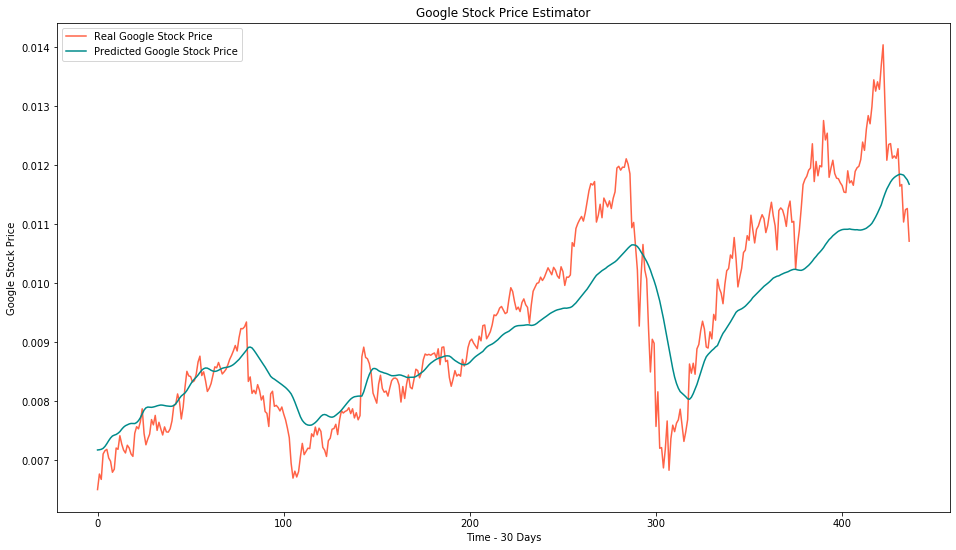

In [44]:
# Plot the results
plt.figure(figsize=(16,9))
plt.plot(y_test, color = 'tomato', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'darkcyan', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Estimator')
plt.xlabel('Time - 30 Days')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show